> بِسْمِ ٱللّٰهِ ٱلرَّحْمٰنِ ٱلرَّحِيمِ<small>  
Bismillāh ir-raḥmān ir-raḥīm

In the name of God, the Most Gracious, the Most Merciful  
Em nome de Deus, o Clemente, o Misericordioso</small>

# Imports

In [1]:
# #
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from typing import Dict, List, Tuple
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from plot_utils import explore_distribution, plot_feature, plot_correlation

# Code

## Loading the Dataframe

In [2]:
df = pd.read_csv('TelecomX_Data_Transformed.csv')
df.drop(columns=['CustomerID', 'Demographics'], inplace=True) # Dropping unnecessary features
df.head()

,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total,Daily
0,No,Female,No,Yes,Yes,9,Yes,No,DSL,No,...,No,Yes,Yes,No,Anual,Yes,Mailed check,65.6,593.30,2.186667
1,No,Male,No,No,No,9,Yes,Yes,DSL,No,...,No,No,No,Yes,Mensal,No,Mailed check,59.9,542.40,1.996667
2,Yes,Male,No,No,No,4,Yes,No,Fibra Ótica,No,...,Yes,No,No,No,Mensal,Yes,Electronic check,73.9,280.85,2.463333
3,Yes,Male,Yes,Yes,No,13,Yes,No,Fibra Ótica,No,...,Yes,No,Yes,Yes,Mensal,Yes,Electronic check,98.0,1237.85,3.266667
4,Yes,Female,Yes,Yes,No,3,Yes,No,Fibra Ótica,No,...,No,Yes,Yes,No,Mensal,Yes,Mailed check,83.9,267.40,2.796667


## Exploratory Data Analysis

### Info

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7267 non-null   object 
 1   Gender            7267 non-null   object 
 2   SeniorCitizen     7267 non-null   object 
 3   Partner           7267 non-null   object 
 4   Dependents        7267 non-null   object 
 5   Tenure            7267 non-null   int64  
 6   PhoneService      7267 non-null   object 
 7   MultipleLines     7267 non-null   object 
 8   InternetService   7267 non-null   object 
 9   OnlineSecurity    7267 non-null   object 
 10  OnlineBackup      7267 non-null   object 
 11  DeviceProtection  7267 non-null   object 
 12  TechSupport       7267 non-null   object 
 13  StreamingTV       7267 non-null   object 
 14  StreamingMovies   7267 non-null   object 
 15  Contract          7267 non-null   object 
 16  PaperlessBilling  7267 non-null   object 


### Target Variable (Y)

------------------------------
<class 'pandas.core.series.Series'>
RangeIndex: 7267 entries, 0 to 7266
Series name: Churn
Non-Null Count  Dtype 
--------------  ----- 
7267 non-null   object
dtypes: object(1)
memory usage: 56.9+ KB
------------------------------


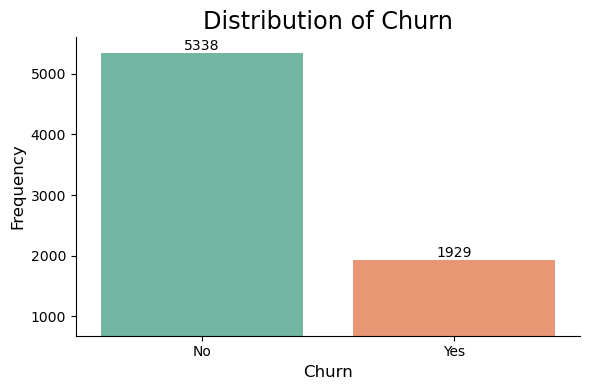

In [4]:
df['Churn'].value_counts()
print('-' * 30)
df['Churn'].info()
print('-' * 30)
plot_feature(df, 'Churn')

### Features (X)

Graphical exploratory analysis of each feature in the dataset.

##### Gender

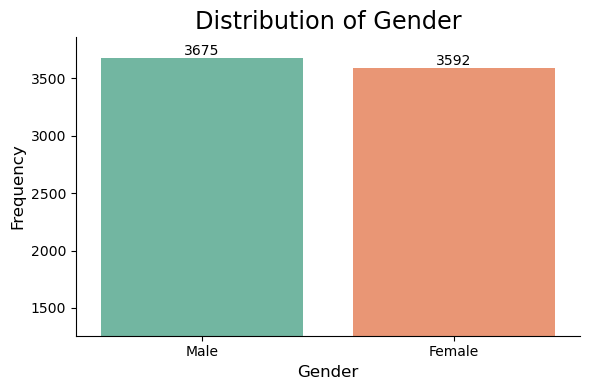

In [5]:
plot_feature(df, 'Gender')

##### SeniorCitizen

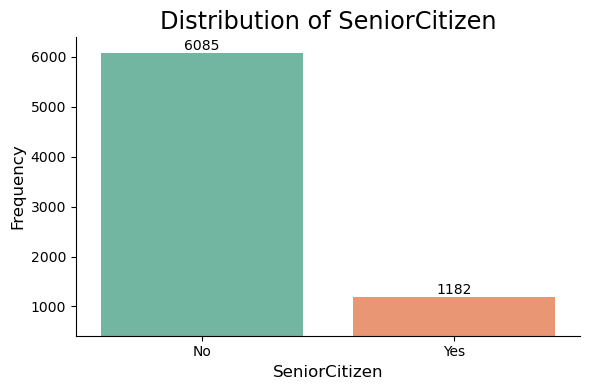

In [6]:
plot_feature(df, 'SeniorCitizen')

#### Partner

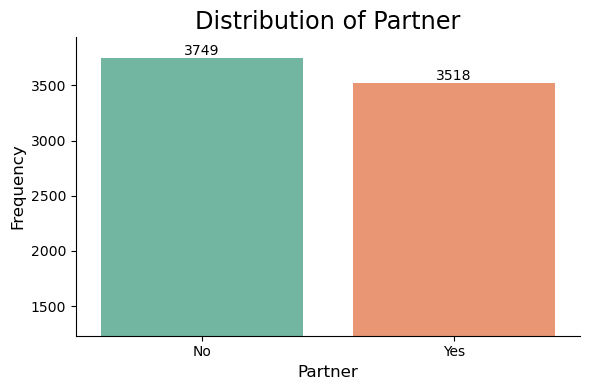

In [7]:
plot_feature(df, 'Partner')

#### Dependents

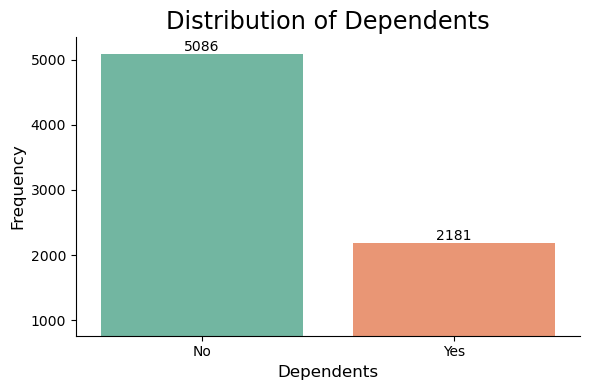

In [8]:
plot_feature(df, 'Dependents')

#### Tenure

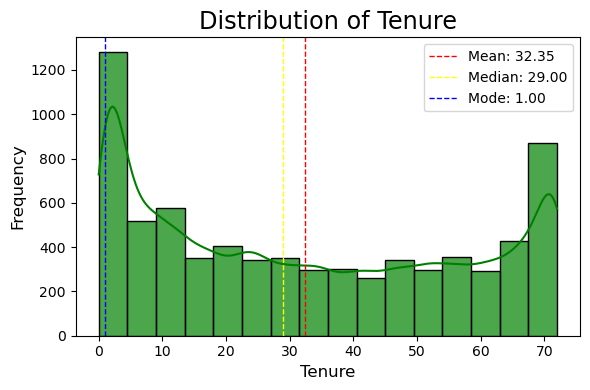

In [9]:
plot_feature(df, 'Tenure')

#### PhoneService

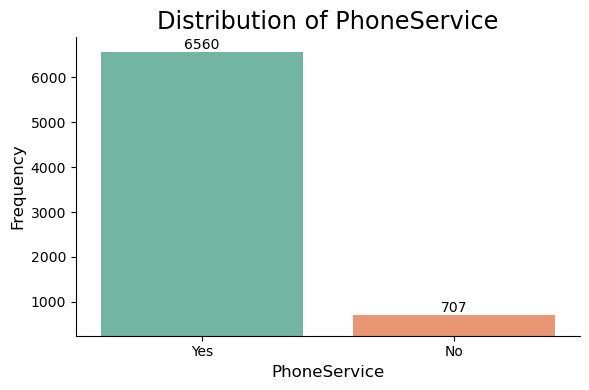

In [10]:
plot_feature(df, 'PhoneService')

#### MultipleLines

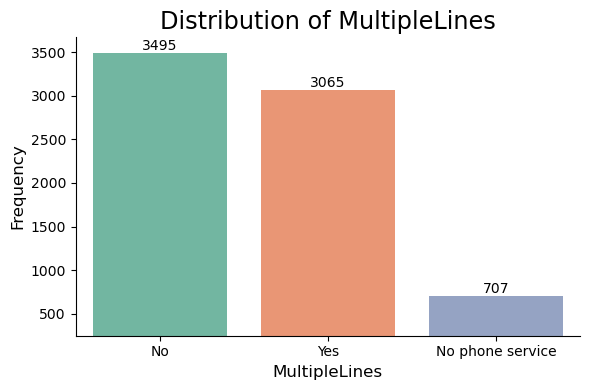

In [11]:
plot_feature(df, 'MultipleLines')

#### InternetService

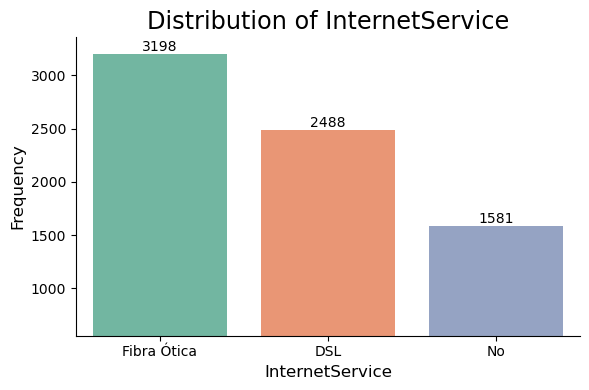

In [12]:
plot_feature(df, 'InternetService')

#### OnlineSecurity

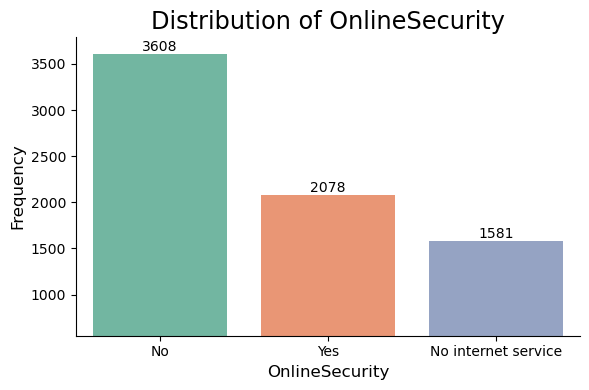

In [13]:
plot_feature(df, 'OnlineSecurity')

#### OnlineBackup

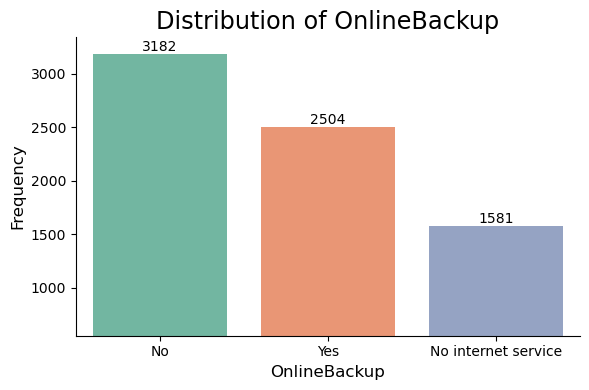

In [14]:
plot_feature(df, 'OnlineBackup')

#### DeviceProtection

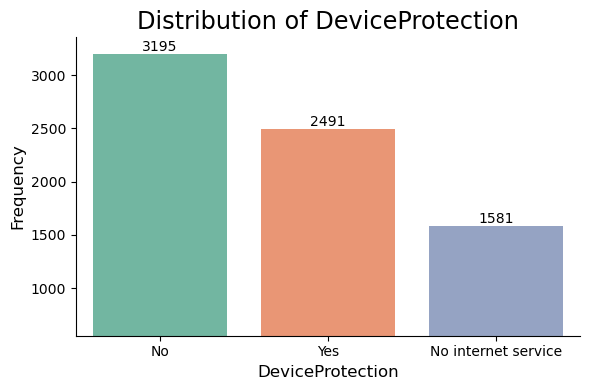

In [15]:
plot_feature(df, 'DeviceProtection')

#### TechSupport

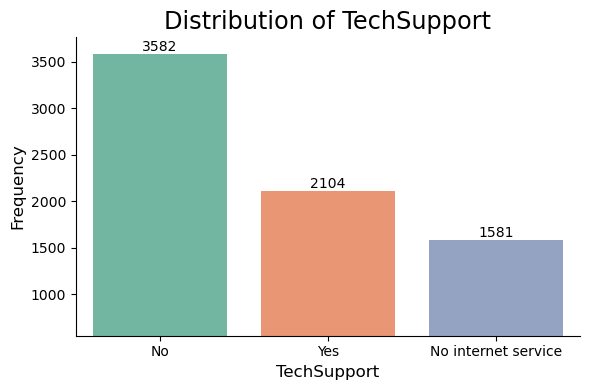

In [16]:
plot_feature(df, 'TechSupport')

#### StreamingTV

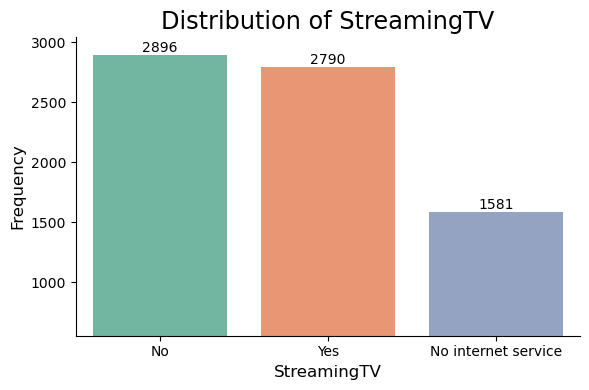

In [17]:
plot_feature(df, 'StreamingTV')

#### StreamingMovies

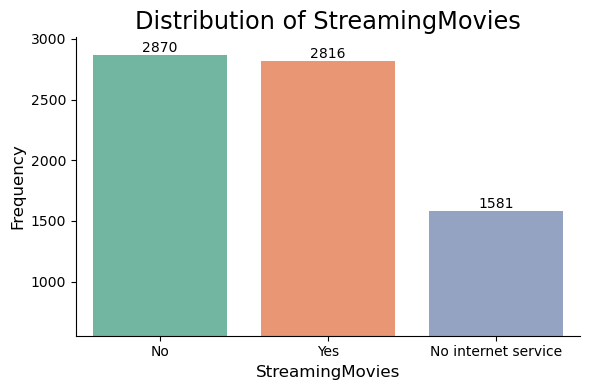

In [18]:
plot_feature(df, 'StreamingMovies')

#### Contract

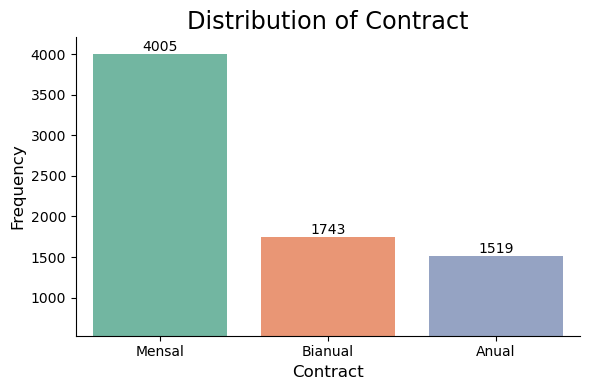

In [19]:
plot_feature(df, 'Contract')

#### PaperlessBilling

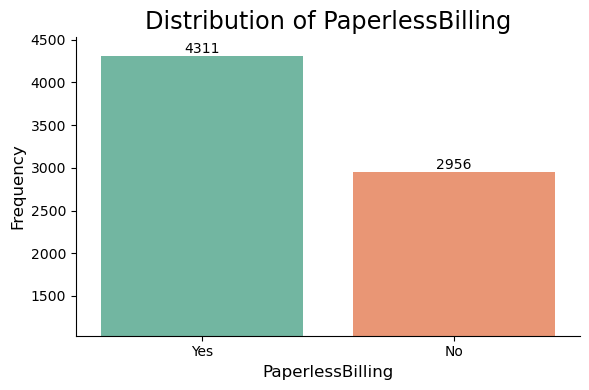

In [20]:
plot_feature(df, 'PaperlessBilling')

#### PaymentMethod

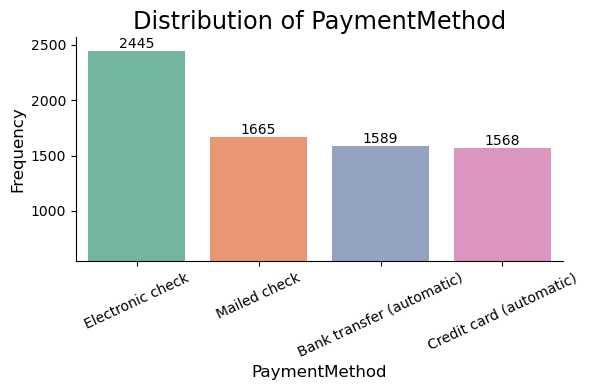

In [21]:
plot_feature(df, 'PaymentMethod')

#### Monthly

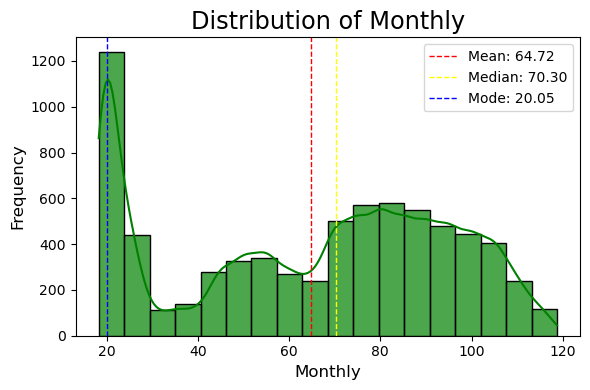

In [22]:
plot_feature(df, 'Monthly')

#### Total

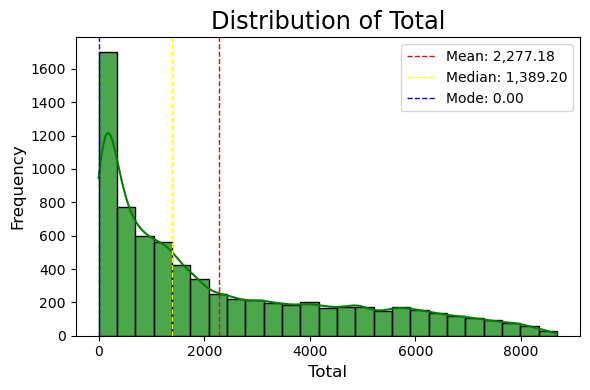

In [23]:
plot_feature(df, 'Total')

#### Daily

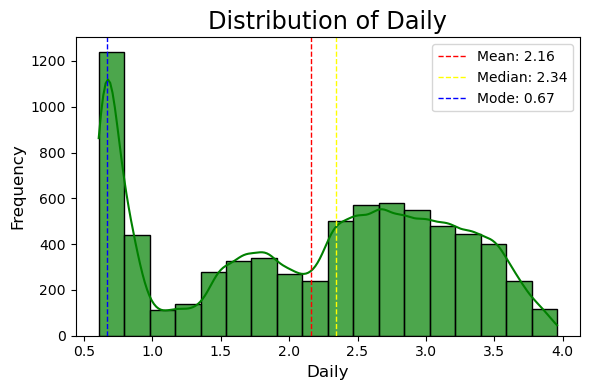

In [24]:
plot_feature(df, 'Daily')

## Data preprocessing

### Continous features

Studying continous features `['Monthly', 'Daily', 'Total', 'Tenure']`

#### Correlations

Analysing the correlation between the continous features

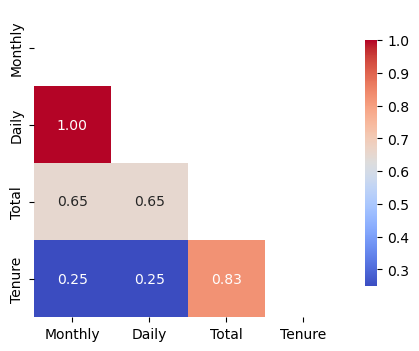

In [25]:
plot_correlation(df, ['Monthly', 'Daily', 'Total', 'Tenure'])

> 1. As expected, 'Daily' feature and 'Monthly' feature correlation is 1, which means they have perfect positive correlation. I happens because Daily = Monthly / 30.  
Monthly shall be dropped

> 2. Tenure and total presents multicollinearity, as Monthly × Tenure ≈ Total.  
Total shall also be dropped.

##### Drop monthly

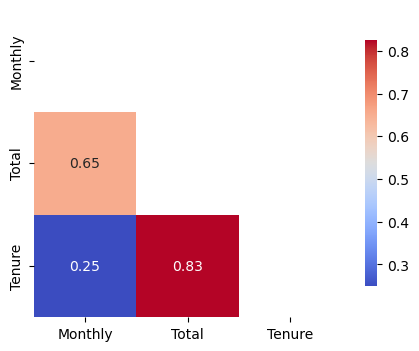

In [26]:
df.drop(columns=['Daily'], inplace=True)
plot_correlation(df, ['Monthly', 'Total', 'Tenure'])

##### Drop total

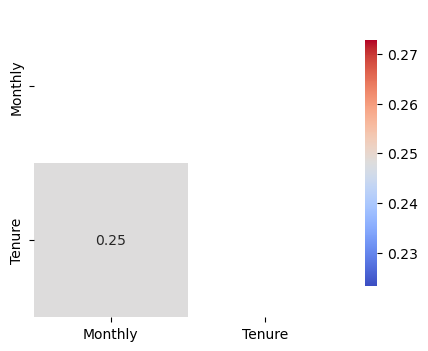

In [27]:
df.drop(columns=['Total'], inplace=True)
plot_correlation(df, ['Monthly', 'Tenure'])

#### Distributions

In [28]:
df.describe()

,Tenure,Monthly
count,7267.000000,7267.000000
mean,32.346498,64.720098
std,24.571773,30.129572
min,0.000000,18.250000
25%,9.000000,35.425000
50%,29.000000,70.300000
75%,55.000000,89.875000
max,72.000000,118.750000


##### Monthly

=> Exploration of Monthly:

Monthly
20.05     65
19.85     46
19.90     46
19.70     45
19.55     45
          ..
23.45      1
116.55     1
106.85     1
68.55      1
67.85      1
Name: count, Length: 1585, dtype: int64
------------------------------
Info:

skewness    -0.216539
kurtosis   -1.261512
count    7267.000000
mean       64.720098
std        30.129572
min        18.250000
25%        35.425000
50%        70.300000
75%        89.875000
max       118.750000
Name: Monthly, dtype: float64
------------------------------


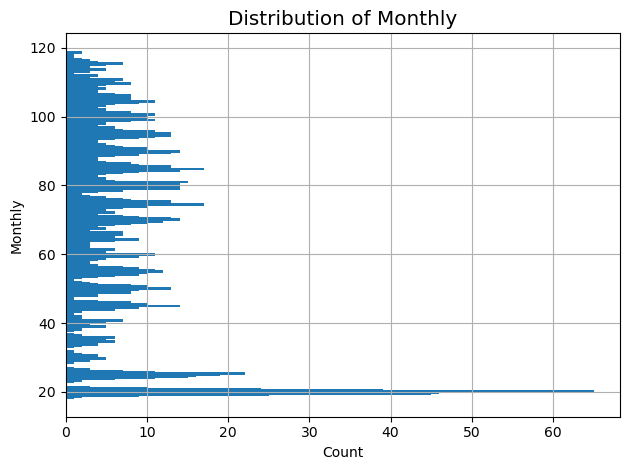

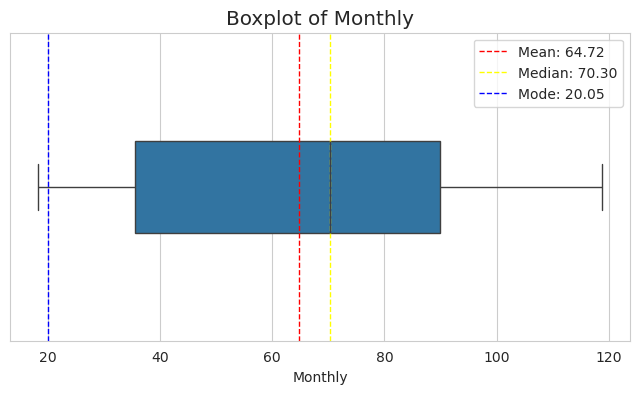

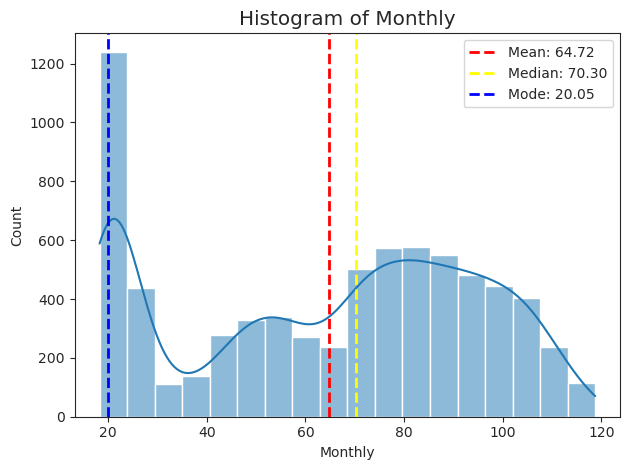

In [29]:
explore_distribution(df, 'Monthly')

##### Tenure

=> Exploration of Tenure:

Tenure
1     634
72    369
2     246
3     207
4     185
     ... 
38     60
39     59
44     54
36     50
0      11
Name: count, Length: 73, dtype: int64
------------------------------
Info:

skewness    0.239523
kurtosis   -1.388981
count    7267.000000
mean       32.346498
std        24.571773
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: Tenure, dtype: float64
------------------------------


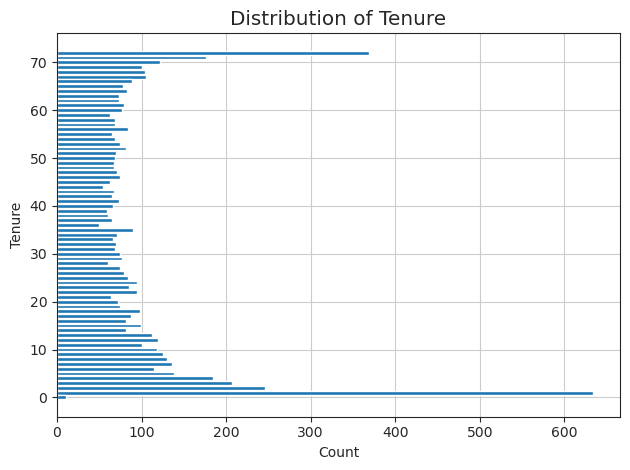

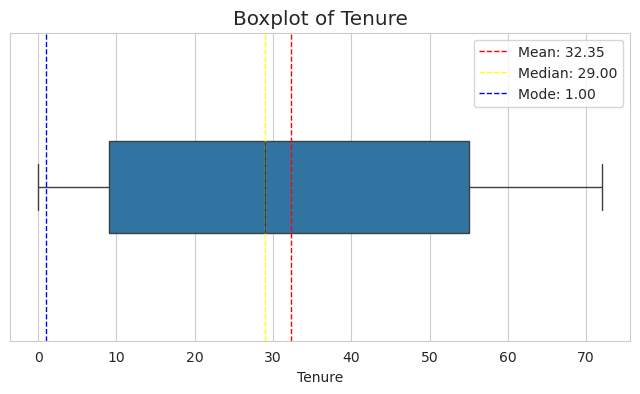

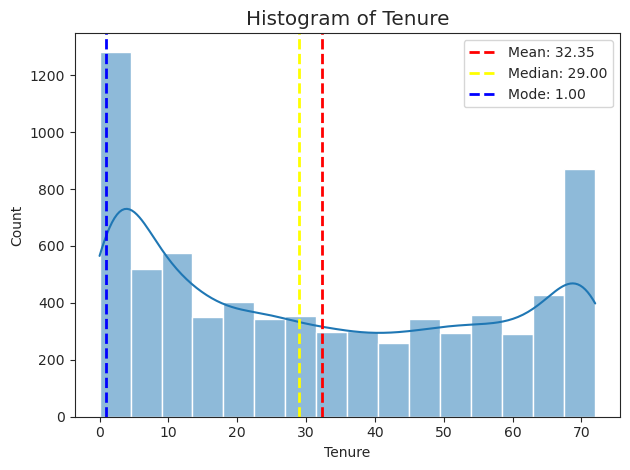

In [30]:
explore_distribution(df, 'Tenure')

#### Considerations

1. The continous features are right-skewed and uneven.

2. The possibility of binning is not fit for `Monthly` due to the length of unique values, but may be a good strategy for `Tenure`

#### Tenure: Test binning strategies

Testing binning approaches for `Tenure`:
> "Tenure" feature is composed of continous unique values in the range of 0 to 72 months. Hence, a good candidate for binning. This section will explore the best approach, if any, for binning this feature.

##### Binning

In [31]:
def categorize_tenure(df: pd.DataFrame) -> Tuple[pd.DataFrame, Dict[int, str], Dict[int, str], Dict[int, str]]:
    """
    Categorize the 'Tenure' feature into different groups using two approaches.

    The first approach divides the tenure into four groups: < 1 year, 1 - 3 years, 3 - 5 years and > 5 years.
    The second approach divides the tenure into four groups: < 6 months, 6 months - 2 years, 2 - 4 years and > 4 years.
    The third approach uses quantiles to divide the tenure into four groups.

    Parameters
    ----------
    df : pd.DataFrame
        DataFrame containing the 'Tenure' column to be categorized.

    Returns
    -------
    Tuple[pd.DataFrame, Dict[int, str], Dict[int, str], Dict[int, str]]
        Modified DataFrame with 'TenureGroup1', 'TenureGroup2' and 'TenureGroupQuantile' columns,
        and three dictionaries for mapping the group codes to descriptive strings.
    """

    # Approach 1
    # Divide the tenure into four groups: < 1 year, 1 - 3 years, 3 - 5 years and > 5 years
    bins1: List[int] = [0, 12, 36, 60, 72]
    labels1: List[int] = [0, 1, 2, 3]
    df['TenureGroup1'] = pd.cut(df['Tenure'], bins=bins1, labels=labels1, right=True).astype(float)

    # Mapping for group codes to descriptive strings
    tenure_group1_mapping: Dict[int, str] = {
        0: '< 1 year',
        1: '1 - 3 years',
        2: '3 - 5 years',
        3: '> 5 years'
    }

    # Approach 2
    # Divide the tenure into four groups: < 6 months, 6 months - 2 years, 2 - 4 years and > 4 years
    bins2: List[int] = [0, 6, 24, 48, 72]
    labels2: List[int] = [0, 1, 2, 3]
    df['TenureGroup2'] = pd.cut(df['Tenure'], bins=bins2, labels=labels2, right=True).astype(float)

    # Mapping for group codes to descriptive strings
    tenure_group2_mapping: Dict[int, str] = {
        0: '< 6 months',
        1: '6 months - 2 years',
        2: '2 - 4 years',
        3: '> 4 years'
    }

    # Approach 3
    # Divide the tenure into four groups using quantiles
    df['TenureGroupQuantile'] = pd.qcut(df['Tenure'], q=4, labels=False)

    # Mapping for group codes to descriptive strings
    tenure_group_quantile_mapping: Dict[int, str] = {
        0: '1st quartile (lowest 25%)',
        1: '2nd quartile (25%-50%)',
        2: '3rd quartile (50%-75%)',
        3: '4th quartile (highest 25%)'
    }

    return df, tenure_group1_mapping, tenure_group2_mapping, tenure_group_quantile_mapping

In [32]:
df, tenure_group1_mapping, tenure_group2_mapping, tenure_group_quantile_mapping = categorize_tenure(df)

##### Testing

=> Exploration of TenureGroup1:

TenureGroup1
0.0    2254
1.0    1908
2.0    1643
3.0    1451
Name: count, dtype: int64
------------------------------
Info:

skewness    0.226847
kurtosis   -1.306616
count    7256.000000
mean        1.315739
std         1.112404
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         3.000000
Name: TenureGroup1, dtype: float64
------------------------------


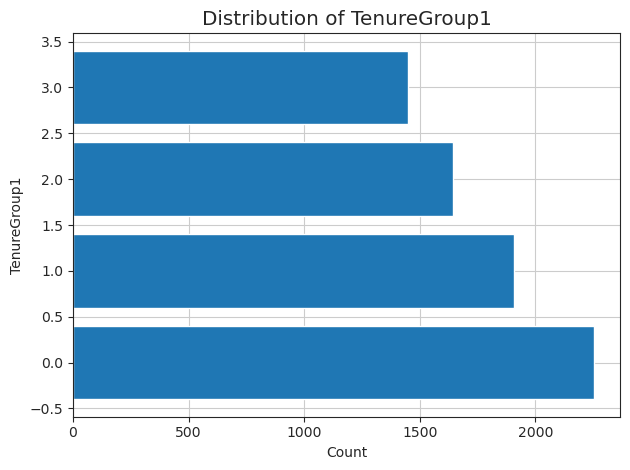

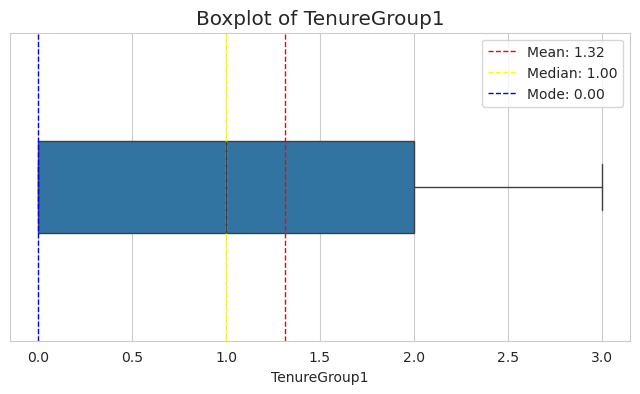

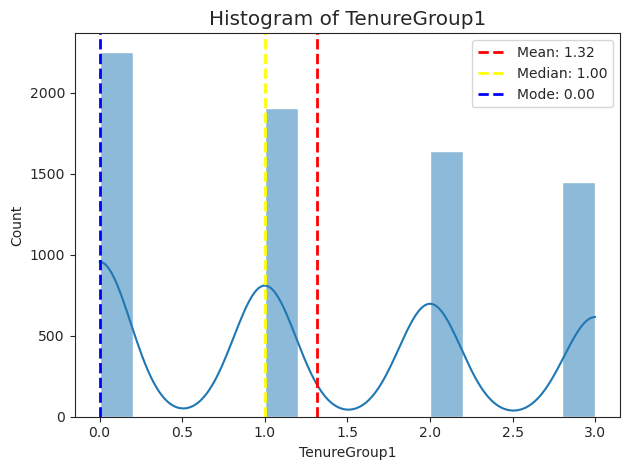

=> Exploration of TenureGroup2:

TenureGroup2
3.0    2309
1.0    1774
2.0    1648
0.0    1525
Name: count, dtype: int64
------------------------------
Info:

skewness    -0.159375
kurtosis   -1.381858
count    7256.000000
mean        1.653390
std         1.132885
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         3.000000
Name: TenureGroup2, dtype: float64
------------------------------


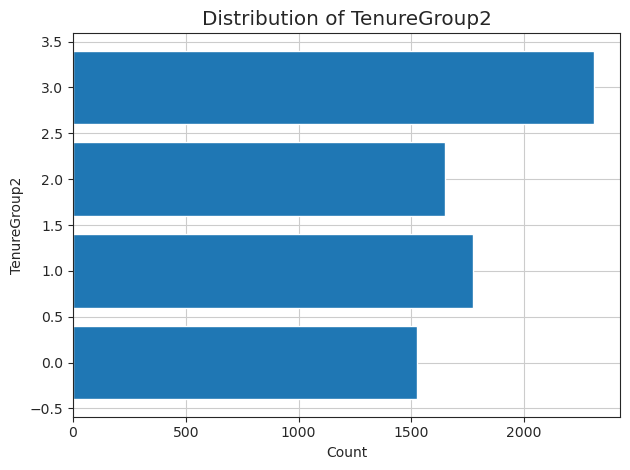

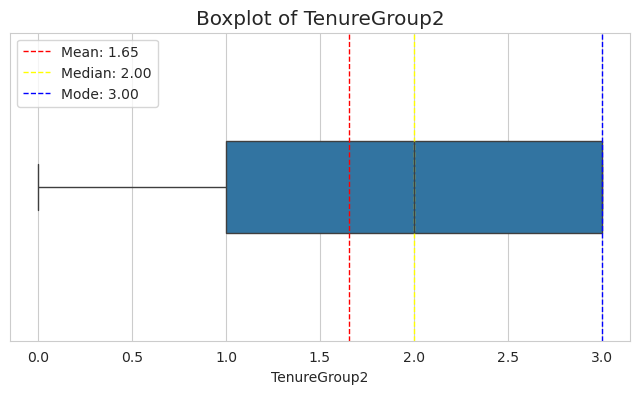

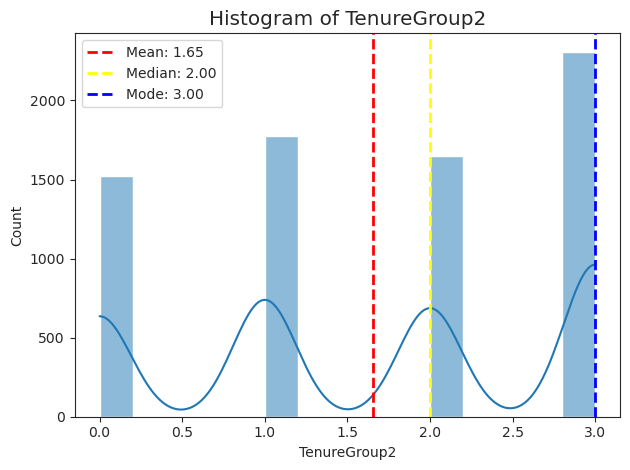

=> Exploration of TenureGroupQuantile:

TenureGroupQuantile
0    1927
3    1813
2    1770
1    1757
Name: count, dtype: int64
------------------------------
Info:

skewness    0.023608
kurtosis   -1.388869
count    7267.000000
mean        1.477363
std         1.130917
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         3.000000
Name: TenureGroupQuantile, dtype: float64
------------------------------


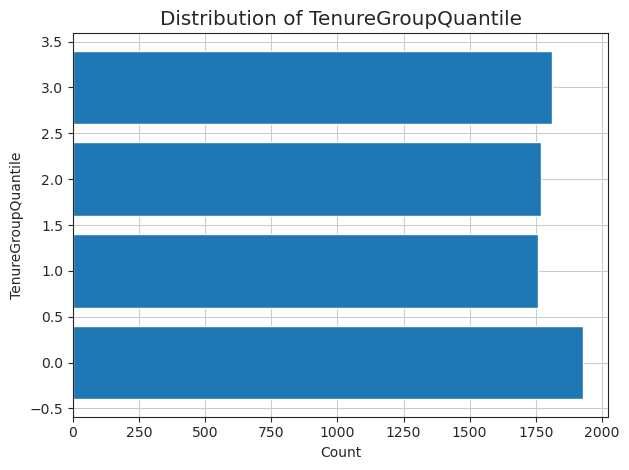

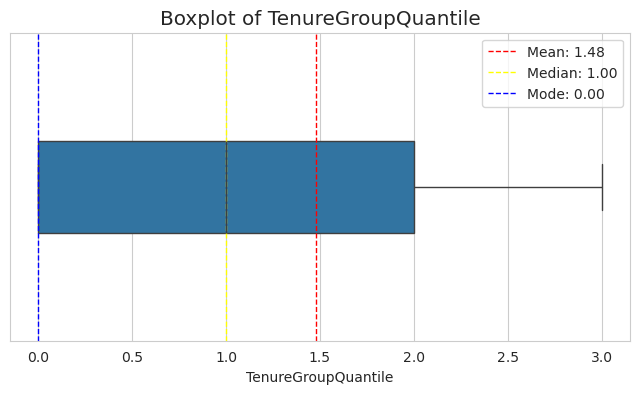

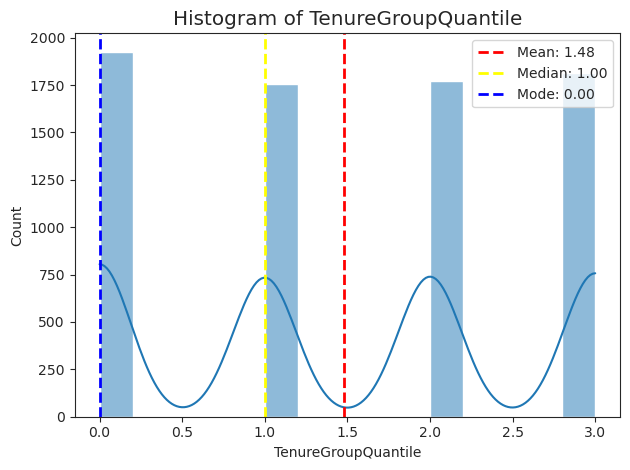

In [33]:
explore_distribution(df, 'TenureGroup1')
explore_distribution(df, 'TenureGroup2')
explore_distribution(df, 'TenureGroupQuantile')

#### Considerations

1. The `Tenure` is right-skewed distributed with an explosion for values >= 70 months.

2. All the approaches were unfair with the original data distribution, leading to loss of important information.
3. The most conservative approach of keeping the original data distribution was selected for this project.
Values will be scaled alongside with the continous feature `Monthly`.

In [34]:
df.drop(columns=['TenureGroup1', 'TenureGroup2', 'TenureGroupQuantile'], inplace=True)